In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\kella\OneDrive\Documents\Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [9]:
array=df.values

In [11]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [13]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)

In [14]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [15]:
import scipy.cluster.hierarchy as sch

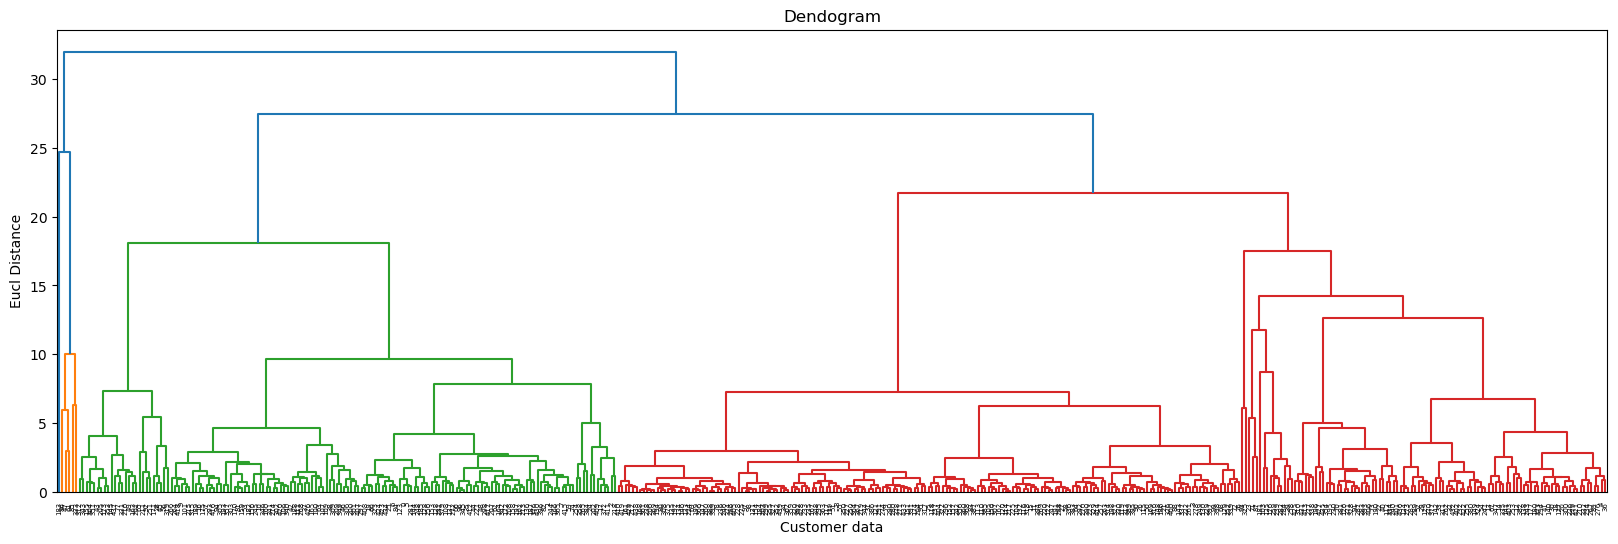

In [16]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show() 

In [17]:
len(set(dendo['color_list']))-1

3

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
group = AgglomerativeClustering(n_clusters=3)
group.fit_predict(x)

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [20]:
cluster = group.fit_predict(x)
cluster.shape

(440,)

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(x,cluster)

0.2646091480214908

In [22]:
# Kmeans

x

In [58]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters= 5, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 
import warnings
warnings.filterwarnings('ignore')

In [60]:
wcss

[1070.2551995135614,
 1070.2551995135614,
 1070.2551995135614,
 1070.2551995135614,
 1070.2551995135614,
 1070.2551995135614,
 1070.2551995135614,
 1070.2551995135614,
 1070.2551995135614]

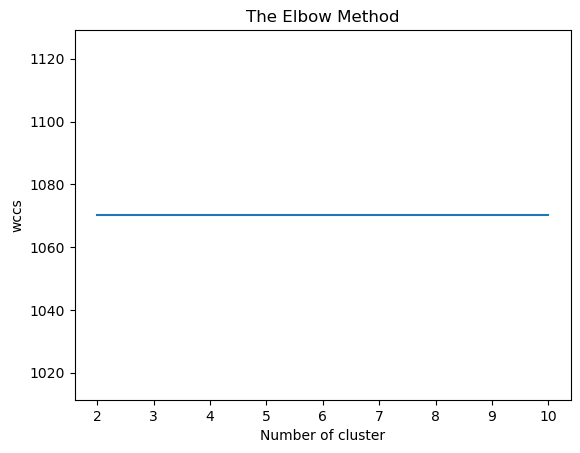

In [62]:
plt.plot (range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wccs')
plt.show()

In [153]:
model = KMeans(n_clusters = 4, random_state = 309)
groups = model.fit_predict(x)

In [155]:
type(group)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [157]:
group

AgglomerativeClustering(n_clusters=3)

In [159]:
groups.shape

(440,)

In [163]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,0
2,0
3,2
4,2
...,...
435,2
436,2
437,0
438,2


In [165]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,2


In [167]:
silhouette_score(x,groups)

0.3453424633499498

In [183]:
cust_kmeans_data[cust_kmeans_data['Group']==2]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,2
5,9413,8259,5126,666,1795,1451,2
6,12126,3199,6975,480,3140,545,2
...,...,...,...,...,...,...,...
434,16731,3922,7994,688,2371,838,2
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,2
438,10290,1981,2232,1038,168,2125,2


In [179]:
cust_kmeans_data[cust_kmeans_data['Group']==4]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group


In [175]:
cust_kmeans_data[cust_kmeans_data['Group']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
9,6006,11093,18881,1159,7425,2098,0
10,3366,5403,12974,4400,5977,1744,0
12,31714,12319,11757,287,3881,2931,0
...,...,...,...,...,...,...,...
418,660,8494,18622,133,6740,776,0
420,4456,5266,13227,25,6818,1393,0
426,13134,9347,14316,3141,5079,1894,0
430,3097,4230,16483,575,241,2080,0


In [ ]:
DBSCAN

In [189]:
from sklearn.cluster import DBSCAN

In [197]:
db_model = DBSCAN(eps=3.2, min_samples=10)
db_model.fit(x)

DBSCAN(eps=3.2, min_samples=10)

In [203]:
label=db_model.labels_
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [205]:
silhouette_score(x,label)

0.7738898379253679